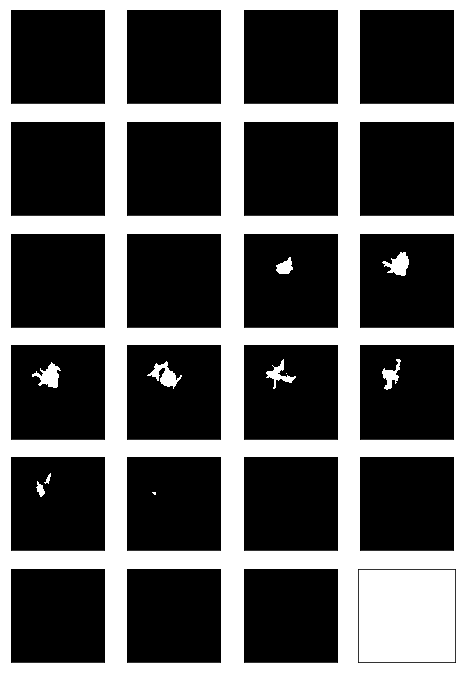

In [5]:
##############################################################
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt

##############################################################
def get_fname(patient, is_mask = False):
    fpath = os.path.join(FP_LGG, patient)
    if is_mask:
        pattern = "_([^_]*)_mask.tif$"
        fname = np.array([x for x in os.listdir(fpath) if "mask" in x])
    else:
        pattern = "_([^_]*).tif$"
        fname = np.array([x for x in os.listdir(fpath) if "mask" not in x])
    index = np.array([int(re.findall(pattern, x)[0]) for x in fname])
    idx = np.argsort(index)
    return fname[idx]

##############################################################
FP_LGG = "/data/Duke_BIOS824/LGG-segmentation/"
patients = [x for x in os.listdir(FP_LGG) if "TCGA" in x]    
patient = 'TCGA_CS_4941_19960909'

##############################################################
img_slice, img_mask = dict(), dict()

lst = get_fname(patient, is_mask = True)
img = [plt.imread(os.path.join(FP_LGG, patient, fname)) for fname in lst]
img_mask[patient]  = np.array(img)
    
lst = get_fname(patient, is_mask = False)
img = [plt.imread(os.path.join(FP_LGG, patient, fname)) for fname in lst]
img_slice[patient] = np.array(img)

##############################################################
fig, axes = plt.subplots(ncols=4, nrows=6, figsize = (2*4, 2*6))
axes = axes.ravel()

mask    = img_mask[patient]
num_img = mask.shape[0]

for idx in range(num_img):
    axes[idx].imshow(mask[idx], cmap = "gray")

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

In [11]:
img  = img_mask[patient].copy()
img  = np.swapaxes(img,0,1)
img  = np.swapaxes(img,1,2)
mask = img.copy()

In [18]:
def get_neighbors(img, x, y, n):
    neighbors = np.array([
        img[xi, yi]
        for xi in range(x-n, x+n+1)
        for yi in range(y-n, y+n+1)
    ])
    return neighbors

def get_boundary(img, n = 2):
    x, y = np.arange(256), np.arange(256)
    x, y = np.meshgrid(x, y)
    x, y = x.ravel(), y.ravel()

    xc, yc = list(), list()
    for xi, yi in zip(x, y):
        if img[xi, yi] != 0:
            neighbors = get_neighbors(img, xi, yi, n)
            if (np.all(neighbors == 255)):
                xc.append(xi)
                yc.append(yi)
                
    img_new = img.copy()
    img_new[xc, yc] = 0 
    return img_new

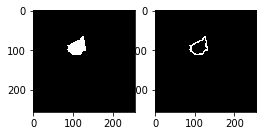

In [19]:
img1 = mask[:, :, 10]
img2 = get_boundary(img1, n = 3)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (4, 2))
axes[0].imshow(img1, cmap = "gray")
axes[1].imshow(img2, cmap = "gray")

In [165]:
img.shape

(256, 256, 23)

In [286]:
###
x_c = list(np.arange(0, 256, 3))
y_c = list(np.arange(0, 256, 3))
z_c = list(range(23))

###
x_c, y_c, z_c = np.meshgrid(x_c, y_c, z_c)
x_c = x_c.ravel()
y_c = y_c.ravel()
z_c = z_c.ravel()

###
cord = np.array([
    (x, y, z, img[x, y, z]) 
    for x, y, z in zip(x_c, y_c, z_c)
    if img[x, y, z] > 0
])

###
cord = pd.DataFrame(cord, columns=["x", "y", "z", "val"])
print(cord.shape)
cord.head()

(1598, 4)


,x,y,z,val
0,81,57,12,255
1,81,57,13,255
2,84,57,12,255
3,72,60,15,255
4,75,60,14,255


In [288]:
cord.to_csv("cord.csv", index=False)

In [287]:
np.min(cord.z), np.max(cord.z)

(10, 17)

In [105]:
zi = 12.1
zf = np.floor(zi).astype(int)
zc = np.ceil(zi).astype(int)
wf = zi - zf
wc = zc - zi
print(zf, zc)
print(wf, wc)
print(wf + wc)

12 13
0.09999999999999964 0.9000000000000004
1.0


In [32]:
img = mask[:, :, 10:14].copy()
img.shape

(256, 256, 4)

In [34]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

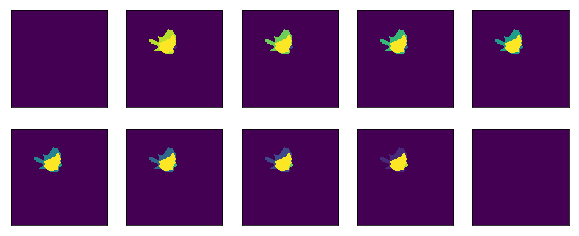

In [38]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(10, 4))
axes = axes.ravel()

img = mask[:, :, 10:14].copy()
imgi = list()
for zi in np.linspace(0, 1, 10):
    if zi < tol
    zf = np.floor(zi).astype(int)
    zc = np.ceil(zi).astype(int)
    wf = zi - zf
    wc = zc - zi
    imgf = img[:, :, zf]
    imgc = img[:, :, zc]
    imgi.append(wc * imgc + wf * imgf)
imgi = np.array(imgi)

for idx, zi in enumerate(axes):
    axes[idx].imshow(imgi[idx])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [267]:
z = np.arange(0.5, 21.5, 1)

cord_new = np.zeros((1, 4))
for zi in z:
    zf = np.floor(zi).astype(int)
    zc = np.ceil(zi).astype(int)
    wf = zi - zf
    wc = zc - zi
    imgf = img[:, :, zf]
    imgc = img[:, :, zc]
    imgi = wc * imgc + wf * imgf
    
    x_c = list(np.arange(0, 256, 10))
    y_c = list(np.arange(0, 256, 10))
    x_c, y_c = np.meshgrid(x_c, yc)
    x_c = x_c.ravel()
    y_c = y_c.ravel()
    
    tmp = np.array([
        (x, y, zi, imgi[x, y]) 
        for x, y in zip(x_c, y_c)
        if imgi[x, y] >= (256 / 10)
    ])
    
    if len(tmp) == 0:
        continue
    
    idx = np.random.randint(0, tmp.shape[0], size=np.ceil(tmp.shape[0] * 0.1).astype(int))
    cord_new=np.vstack([cord_new, tmp[idx, :]])
    
#cord_new = np.stack(cord_new, axis = 0)
cord_new = cord_new[1:]

In [147]:
cord_new = np.vstack([cord_new, cord])

In [268]:
cord_new.shape

(31671, 4)

In [269]:
cord_tmp = cord_new

In [257]:
idx = np.random.randint(0, cord_new.shape[0], size=20000)
cord_tmp = cord_new[idx,:]
#cord_tmp[:, 2] = cord_tmp[:, 2] + np.random.uniform(low = 0, high = 1, size = len(cord_tmp))

In [255]:
idx = np.random.randint(0, cord_new.shape[0], size=20000)
cord_tmp = cord_new[idx,:]
cord_tmp = np.vstack([cord_tmp, cord])

In [283]:
cord_tmp = cord.values
cord_tmp = np.vstack([cord_tmp, cord_tmp])

n, m = cord_tmp.shape
cord_tmp = cord_tmp + np.random.randn(n * m).reshape((cord_tmp.shape))

In [285]:
#x   = cord.x.values
#y   = cord.y.values
#z   = cord.z.values

x   = cord_tmp[:, 0]
y   = cord_tmp[:, 1]
z   = cord_tmp[:, 2]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
from   plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

In [32]:
import plotly.figure_factory as ff
from skimage import measure


In [33]:
x   = cord.x.values
y   = cord.y.values
z   = cord.z.values
val = cord.val.values

vertices, simplices = measure.marching_cubes(val, 0)
x,y,z = zip(*vertices)  

colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']

fig = ff.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=simplices,
                        title="Isosurface")

iplot(fig, filename='3d-scatter-colorscale')

/opt/anaconda3/lib/python3.6/site-packages/skimage/measure/_marching_cubes_lewiner.py:167: skimage_deprecation:

`marching_cubes` now uses a better and faster algorithm, and returns four instead of two outputs (see docstring for details). Backwards compatibility with 0.12 and prior is available with `marching_cubes_classic`. This function will be removed in 0.14, consider switching to `marching_cubes_lewiner`.



ValueError: Input volume should be a 3D numpy array.

In [30]:
surface = go.Surface(
    x = cord.x.values, 
    y = cord.y.values, 
    z = cord.z.values)

data = [surface]
fig = go.Figure(data=data)
iplot(fig)

In [ ]:
plot_ly(x = xs, y = ys, z = zs, surfacecolor = gradient,
             type = "surface", colorbar = list(title = 'x'))

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')
df.values

array([[100, 100, 101, ..., 104, 104, 103],
       [101, 101, 102, ..., 105, 104, 104],
       [102, 102, 103, ..., 105, 105, 104],
       ...,
       [ 98,  98,  98, ...,  94,  94,  94],
       [ 97,  98,  98, ...,  94,  94,  94],
       [ 97,  97,  97, ...,  94,  94,  94]])

[[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


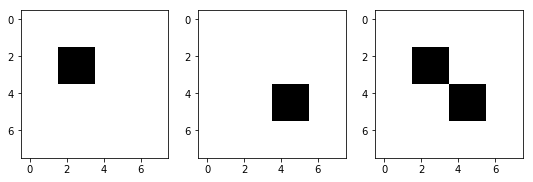

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import interpolate

n = 8
img1 = np.zeros((n, n))
img2 = np.zeros((n, n))

img1[2:4, 2:4] = 1
img2[4:6, 4:6] = 1

points = (np.r_[0, 2], np.arange(n), np.arange(n))
values = np.stack((img1, img2))
xi = np.rollaxis(np.mgrid[:n, :n], 0, 3).reshape((n**2, 2))
xi = np.c_[np.ones(n**2), xi]

values_x = interpolate.interpn(points, values, xi, method='linear')
values_x = values_x.reshape((n, n))
print(values_x)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(9, 3))
axes[0].imshow(img1, cmap=cm.Greys)
axes[1].imshow(img2, cmap=cm.Greys)
axes[2].imshow(values_x, cmap=cm.Greys)
#plt.clim((0, 1))

plt.show()